In [19]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
pd.options.display.max_rows = 999
from statsmodels.formula.api import ols


# WebScraping

In [2]:
page = requests.get('https://www.rottentomatoes.com/celebrity/nicolas_cage')

In [20]:
soup = bs(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en" prefix="fb: http://www.facebook.com/2008/fbml og: http://opengraphprotocol.org/schema/" xmlns="http://www.w3.org/1999/xhtml">
 <head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Nicolas Cage - Rotten Tomatoes
  </title>
  <meta content="Nicolas Cage Celebrity Profile - Check out the latest Nicolas Cage photo gallery, biography, pics, pictures, interviews, news, forums and blogs at Rotten Tomatoes!" name="description"/>
  <link href="https://www.rottentomatoes.com/celebrity/nicolas_cage" rel="canonical"/>
  <link href="https://www.rottentomatoes.com/assets/pizza-pie/images/favicon.ico" rel="shortcut icon" sizes="76x76" type="image/x-icon">
   <meta content="326803741017" property="fb:app_id"/

In [21]:

tables = list(soup.find('tbody', {'class':'rt-font-frank-book rt-font-reg--tall'}).stripped_strings)

In [22]:
ratings = []
for item in tables:
    ratings.append([item][0])

# Checking and Cleaning Data

In [445]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

## Removing extra entries where Nicolas Cage is credited with other positions

In [23]:
ratings.remove('Producer') # index 67 -1
# del ratings[171:175] #a thousand words -4
ratings.remove('Executive Producer') #index 199 -1
ratings.remove('Producer') #index 235 -1
ratings.remove('Producer') #index 241 -1
ratings.remove('Producer') #index 257 -1
ratings.remove('Producer') #index 277 -1
ratings.remove('Producer') #index 299 -1
# del ratings[312:316] #-4
ratings.remove('Producer') #index 325 -1
ratings.remove('Director') #index 326 -1
# del ratings[344:348] #-4

In [447]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

## Removing entries where Nicholas Cage is credited as Producer Only

In [24]:
del ratings[170:174] #a thousand words -4


In [449]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

In [25]:
del ratings[310:316] #-4 #Sonny


In [451]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

In [26]:
del ratings[325:330] #-4 #shadow of the vampire

In [453]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

In [27]:
del ratings[300:305] #life of david gale


In [31]:
for idx, val in enumerate(ratings):
  print("index is %d and value is %s" % (idx, val))

index is 0 and value is No Score Yet
index is 1 and value is The Croods 2
index is 2 and value is Grug
index is 3 and value is —
index is 4 and value is 2020
index is 5 and value is 17%
index is 6 and value is A Score to Settle
index is 7 and value is Frankie Carver
index is 8 and value is —
index is 9 and value is 2019
index is 10 and value is 98%
index is 11 and value is Love, Antosha
index is 12 and value is Actor
index is 13 and value is —
index is 14 and value is 2019
index is 15 and value is No Score Yet
index is 16 and value is Color Out of Space
index is 17 and value is Actor
index is 18 and value is —
index is 19 and value is 2019
index is 20 and value is 97%
index is 21 and value is Spider-Man: Into the Spider-Verse
index is 22 and value is Spider-Man Noir
index is 23 and value is —
index is 24 and value is 2018
index is 25 and value is 91%
index is 26 and value is Mandy
index is 27 and value is Red
index is 28 and value is —
index is 29 and value is 2018
index is 30 and valu

## Data is ready for Data Frame

In [28]:
i=0
new_list=[]
while i<len(ratings):
  new_list.append(ratings[i:i+5])
  i+=5

In [29]:
labels = ['Score', 'Title', 'Role', 'Gross', 'Year']
df = pd.DataFrame.from_records(new_list, columns = labels)

In [34]:
# df = df.replace('No Score Yet','0')
df['Score'] = df['Score'].str.rstrip('%').astype('float') / 100.0

df['Year'] = pd.to_numeric(df['Year'])

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

### Testing Data for Patterns

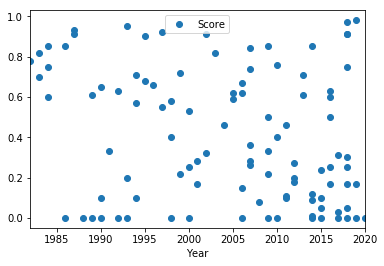

In [351]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x='Year', y='Score', style='o')


### More Cleaning

In [464]:
df.drop(columns =['Title', 'Role', 'Gross'], inplace = True)

KeyError: "['Title' 'Role' 'Gross'] not found in axis"

In [469]:
df9 = df[(df != 0).all(1)]


### Grouping Scores by Year and Finding the Mean

In [471]:
dfmean = df9.groupby(df9.Year)['Score'].mean()

In [473]:
df1 = pd.DataFrame(dfmean)

In [474]:
df2 = df1.reset_index()

#### Isolating years 1999 - 2009 to match our Drowning Data

In [475]:
df3 = df2.loc[16:26]

In [477]:
df3 = df3.reset_index()

In [478]:
df3 = df3.drop(['index'], axis = 1)

#### Plotting inital line graph

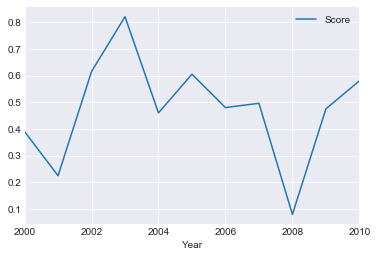

In [480]:
df3.plot.line(x = 'Year', y = 'Score')

### Creating Drowning Data

In [481]:
drownings = [[1999, 109], [2000, 102], [2001, 102], [2002, 98], [2003, 85], [2004, 95], [2005, 96], [2006, 98], [2007, 123], [2008, 94], [2009, 102]]

In [482]:
drown = pd.DataFrame(drownings)

In [483]:
drown

,0,1
0,1999,109
1,2000,102
2,2001,102
3,2002,98
4,2003,85
5,2004,95
6,2005,96
7,2006,98
8,2007,123
9,2008,94


In [484]:
drown = drown.rename(columns={0:'Years', 1:'Drownings'})

### Concating Nicolas Cage data with Drowning Data

In [485]:
dfall = pd.concat([df3, drown], axis = 1)

In [486]:
dfalls = dfall.drop(['Years'], axis = 1)

<Figure size 720x2160 with 0 Axes>

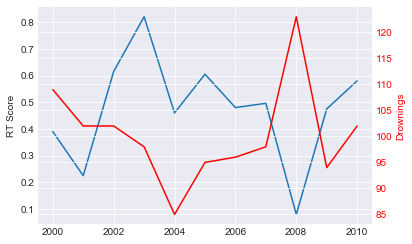

In [497]:

plt.style.use('seaborn-darkgrid')
plt.figure (figsize=(10,30))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot('Year', 'Score', data=dfalls)
ax1.set_ylabel('RT Score')

ax2 = ax1.twinx()
ax2.plot('Year', 'Drownings', 'r-', data=dfalls)
ax2.set_ylabel('Drownings', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


In [489]:
dfalls.corr()

,Year,Score,Drownings
Year,1.000000,-0.043043,0.021879
Score,-0.043043,1.000000,-0.577172
Drownings,0.021879,-0.577172,1.000000


In [509]:
dfalls.to_csv(r'\score.csv')

In [35]:
dfalls = pd.read_csv('score.csv')

In [36]:
cage_model = ols(formula='Score~Drownings', data=dfalls).fit()
cage_model.summary()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4.496
Date:                Mon, 02 Sep 2019   Prob (F-statistic):             0.0630
Time:                        13:09:26   Log-Likelihood:                 4.9453
No. Observations:                  11   AIC:                            -5.891
Df Residuals:                       9   BIC:                            -5.095
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6655      0.564      2.954      0.016       0.390       2.941
Drownings     -0.0119      0.006     -2.120      0.063      -0.025       0.001
==============================================================================
Omnibus:                        0.539   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.764   Jarque-Bera (JB):                0.384
Skew:                           0.385   Prob(JB):                        0.825
Kurtosis:                       2.503   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""